In [1]:
from sympy import symbols, Eq, solve

# Redefining the variable for time t and radius r
t = symbols('t')
r = symbols('r')
UAV_Speed =30
UGV_Speed =10
# Setting up the equation
equation = Eq(r - UAV_Speed*t, r/2 + UGV_Speed*t)

# Solving for t
time_to_meet = solve(equation, t)[0]
time_to_meet


r/80

In [2]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Given radius
r_value = 10  # in km

# Calculating total time taken by UAV to travel from starting point to meeting point
total_time_UAV = r_value/30 + time_to_meet.subs(r, r_value)

# Calculating distance traveled by UGV in this total time
distance_UGV = 15 * total_time_UAV  # speed of UGV * total time

total_time_UAV, distance_UGV


(0.458333333333333, 6.87500000000000)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Circle parameters
center = (0, 0)
circle = plt.Circle(center, r_value, color='b', fill=False)

# Starting point
start_point = (r_value, 0)

# Calculate meeting point on the circumference using polar coordinates
theta = distance_UGV / r_value  # angle in radians
# meeting_point = (r_value * np.cos(theta), r_value * np.sin(theta))


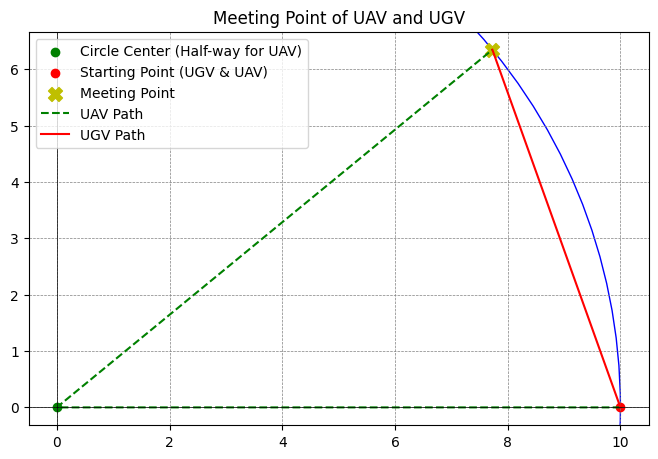

In [5]:
# Convert theta to a standard floating-point number
theta_float = float(theta)

# Calculate meeting point on the circumference using polar coordinates
meeting_point = (r_value * np.cos(theta_float), r_value * np.sin(theta_float))

fig, ax = plt.subplots(figsize=(8,8))
ax.add_artist(circle)
plt.scatter(*center, color='g', label='Circle Center (Half-way for UAV)')
plt.scatter(*start_point, color='r', label='Starting Point (UGV & UAV)')
plt.scatter(*meeting_point, color='y', marker='X', s=100, label='Meeting Point')

# Plot path for UAV and UGV
plt.plot([start_point[0], center[0], meeting_point[0]], [start_point[1], center[1], meeting_point[1]], 'g--', label='UAV Path')
plt.plot([start_point[0], meeting_point[0]], [start_point[1], meeting_point[1]], 'r-', label='UGV Path')

plt.title("Meeting Point of UAV and UGV")
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


In [6]:
def find_meeting_point(radius, ugv_start, ugv_end, speed_ugv, speed_uav,survey_time):
    """
    Calculates the meeting point of UGV and UAV on the chord.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - speed_ugv: Speed of UGV.
    - speed_uav: Speed of UAV.
    - survey_time: Time of survey the point
    Returns:
    - Meeting point of UGV and UAV on the chord.
    """
    
    # Calculating the length of the chord
    chord_length = np.sqrt((ugv_end[0] - ugv_start[0])**2 + (ugv_end[1] - ugv_start[1])**2)
    
    # Distance traveled by UGV when UAV reaches the center
    distance_ugv_traveled = speed_ugv * ((radius / speed_uav)+survey_time)
    
    # Remaining distance on the chord for UGV
    remaining_distance = chord_length - distance_ugv_traveled
    
    # Time taken by UAV and UGV to meet on the chord after UAV reaches center
    time_to_meet = remaining_distance / (speed_uav + speed_ugv)
    
    # Total distance traveled by UGV on the chord till they meet
    total_distance_ugv = distance_ugv_traveled + speed_ugv * time_to_meet
    
    # Coordinates of the meeting point on the chord
    x_meeting = ugv_start[0] + (total_distance_ugv / chord_length) * (ugv_end[0] - ugv_start[0])
    y_meeting = ugv_start[1] + (total_distance_ugv / chord_length) * (ugv_end[1] - ugv_start[1])
    
    return (x_meeting, y_meeting)

# Test the function with given parameters
meeting_point = find_meeting_point(2, (0, 2), (2, 0), 15, 30,1/6 )
meeting_point


(2.3165824894352776, -0.31658248943527756)

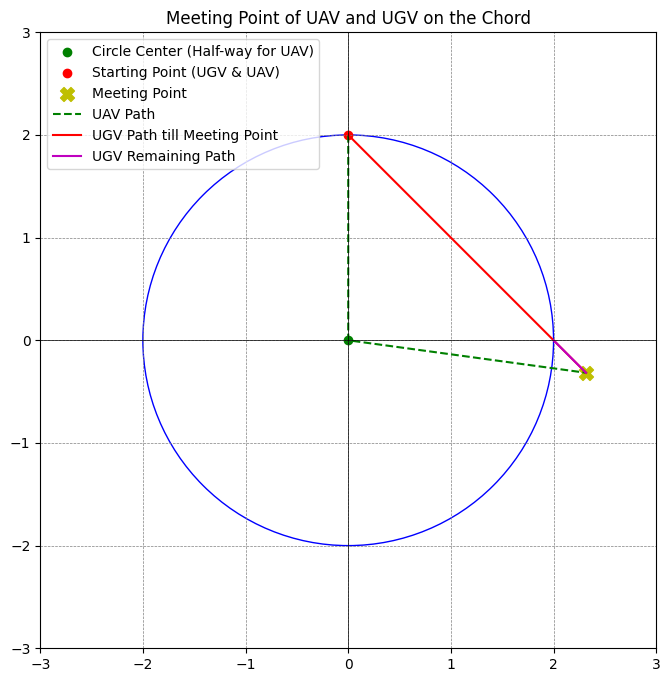

In [7]:
def visualize_meeting_point_updated(radius, ugv_start, ugv_end, meeting_point):
    """
    Visualizes the meeting point of UGV and UAV on the chord with updated visuals.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - meeting_point: Calculated meeting point of UGV and UAV.
    """
    
    # Circle parameters
    center = (0, 0)
    circle = plt.Circle(center, radius, color='b', fill=False)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.add_artist(circle)
    plt.scatter(*center, color='g', label='Circle Center (Half-way for UAV)')
    plt.scatter(*ugv_start, color='r', label='Starting Point (UGV & UAV)')
    plt.scatter(*meeting_point, color='y', marker='X', s=100, label='Meeting Point')

    # Plot path for UAV
    plt.plot([ugv_start[0], center[0], meeting_point[0]], [ugv_start[1], center[1], meeting_point[1]], 'g--', label='UAV Path')
    
    # Plot path for UGV till meeting point
    plt.plot([ugv_start[0], meeting_point[0]], [ugv_start[1], meeting_point[1]], 'r-', label='UGV Path till Meeting Point')
    
    # Plot remaining path for UGV after meeting point
    plt.plot([meeting_point[0], ugv_end[0]], [meeting_point[1], ugv_end[1]], 'm-', label='UGV Remaining Path')

    plt.title("Meeting Point of UAV and UGV on the Chord")
    plt.xlim(-radius-1, radius+1)
    plt.ylim(-radius-1, radius+1)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Test the updated visualization function
visualize_meeting_point_updated(2, (0, 2), (2, 0), meeting_point)


In [8]:
def find_meeting_point_with_survey_adjusted(radius, ugv_start, ugv_end, speed_ugv, speed_uav, survey_time):
    """
    Calculates the meeting point of UGV and UAV on the chord considering survey time.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - speed_ugv: Speed of UGV.
    - speed_uav: Speed of UAV.
    - survey_time: Time of survey the point
    
    Returns:
    - Adjusted meeting point of UGV and UAV on the chord.
    - Wait time for UGV (if any).
    """
    
    # Calculating the length of the chord
    chord_length = np.sqrt((ugv_end[0] - ugv_start[0])**2 + (ugv_end[1] - ugv_start[1])**2)
    
    # Distance traveled by UGV when UAV reaches the center and finishes survey
    distance_ugv_traveled = speed_ugv * ((radius / speed_uav) + survey_time)
    
    # Remaining distance on the chord for UGV
    remaining_distance = chord_length - distance_ugv_traveled
    
    # Time taken by UAV and UGV to meet on the chord after UAV finishes survey
    time_to_meet = remaining_distance / (speed_uav + speed_ugv)
    
    # Total distance traveled by UGV on the chord till they meet
    total_distance_ugv = distance_ugv_traveled + speed_ugv * time_to_meet
    
    # Coordinates of the meeting point on the chord
    x_meeting = ugv_start[0] + (total_distance_ugv / chord_length) * (ugv_end[0] - ugv_start[0])
    y_meeting = ugv_start[1] + (total_distance_ugv / chord_length) * (ugv_end[1] - ugv_start[1])
    
    # Check if meeting point is outside the circle
    distance_from_center = np.sqrt(x_meeting**2 + y_meeting**2)
    
    wait_time = 0  # Default wait time
    
    if distance_from_center > radius:
        # Adjust the meeting point to be on the circle's perimeter
        x_meeting, y_meeting = ugv_end[0], ugv_end[1]
        
        # Calculate distance UGV traveled to get to the waiting point
        distance_ugv_traveled = np.sqrt((ugv_start[0] - x_meeting)**2 + (ugv_start[1] - y_meeting)**2)
        
        # Calculate the time taken by UGV to reach the waiting point
        time_ugv = distance_ugv_traveled / speed_ugv
        
        # Time taken by UAV to reach the waiting point from the circle's center after survey
        time_uav = ((radius*2)/speed_uav) + survey_time
        
        # Corrected formula to calculate the wait time for UGV
        wait_time = time_uav - time_ugv
        
        # Calculate the wait time for UGV
        # wait_time =  (radius / speed_uav + time_uav) - time_ugv 
    
    return (x_meeting, y_meeting), wait_time

# Test the function with given parameters
adjusted_meeting_point_survey_updated, wait_time_survey_updated = find_meeting_point_with_survey_adjusted(2, (0, 2), (2, 0), 15, 30, 1/6)
adjusted_meeting_point_survey_updated, wait_time_survey_updated


((2, 0), 0.11143819168358729)

In [9]:
def find_meeting_point_with_survey_final(center,radius, ugv_start, ugv_end, speed_ugv, speed_uav, survey_time):
    """
    Final function to calculate the meeting point of UGV and UAV on the chord considering survey time.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - speed_ugv: Speed of UGV.
    - speed_uav: Speed of UAV.
    - survey_time: Time of survey the point
    
    Returns:
    - Meeting point of UGV and UAV.
    - Wait time for UGV (if any).
    """
    
    # Calculating the length of the chord
    chord_length = np.sqrt((ugv_end[0] - ugv_start[0])**2 + (ugv_end[1] - ugv_start[1])**2)
    
    # Distance traveled by UGV when UAV reaches the center and finishes survey
    distance_ugv_traveled = speed_ugv * ((radius / speed_uav) + survey_time)
    
    # Remaining distance on the chord for UGV
    remaining_distance = chord_length - distance_ugv_traveled
    
    # Time taken by UAV and UGV to meet on the chord after UAV finishes survey
    time_to_meet = remaining_distance / (speed_uav + speed_ugv)
    
    # Total distance traveled by UGV on the chord till they meet
    total_distance_ugv = distance_ugv_traveled + speed_ugv * time_to_meet
    
    # Coordinates of the meeting point on the chord
    x_meeting = ugv_start[0] + (total_distance_ugv / chord_length) * (ugv_end[0] - ugv_start[0])
    y_meeting = ugv_start[1] + (total_distance_ugv / chord_length) * (ugv_end[1] - ugv_start[1])
    
    # Check if meeting point is outside the circle
    distance_from_center = np.sqrt((x_meeting - center[0])**2 + (y_meeting - center[1])**2)
    
    wait_time = 0  # Default wait time
    
    if distance_from_center > radius:
        print("yes",{distance_from_center})
        # Set the meeting point to be the UGV end location
        x_meeting, y_meeting = ugv_end[0], ugv_end[1]
        
        # Calculate distance UGV traveled to get to the end point
        distance_ugv_traveled = chord_length
        
        # Calculate the time taken by UGV to reach the end point
        time_ugv = distance_ugv_traveled / speed_ugv
        
        # Time taken by UAV to reach the UGV end point from the circle's center after survey
        distance_uav_traveled = radius*2
        time_uav = (distance_uav_traveled / speed_uav) + survey_time
        
        # Calculate the wait time for UGV
        wait_time = time_uav - time_ugv
    
    return (x_meeting, y_meeting), wait_time




In [53]:
def visualize_meeting_point_updated(center,radius, ugv_start, ugv_end, meeting_point):
    """
    Visualizes the meeting point of UGV and UAV on the chord with updated visuals.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - meeting_point: Calculated meeting point of UGV and UAV.
    """
    
    # Circle parameters
    center = center
    circle = plt.Circle(center, radius, color='b', fill=False)

    fig, ax = plt.subplots(figsize=(12,12),dpi=300)
    ax.add_artist(circle)
    plt.scatter(*center, color='g', s=100,label='Survey sites (Half-way for UAV)')
    plt.scatter(*ugv_start, color='r', s=100,label='Starting point (UGV & UAV)')
    plt.scatter(*meeting_point, color='y',marker='X', s=130, label='Meeting point')

    # Plot path for UAV
    plt.plot([ugv_start[0], center[0], meeting_point[0]], [ugv_start[1], center[1], meeting_point[1]],'g--',linewidth=2, label='UAV path')
    
    # Plot path for UGV till meeting point
    plt.plot([ugv_start[0], meeting_point[0]], [ugv_start[1], meeting_point[1]], 'r-',  linewidth=2,label='UGV path till meeting point')
    
    # Plot remaining path for UGV after meeting point
    plt.plot([meeting_point[0], ugv_end[0]], [meeting_point[1], ugv_end[1]], 'm-',  linewidth=2,label='UGV remaining path')

    # plt.title("Meeting Point of UAV and UGV on the Chord")
    plt.xlim(center[0]-radius-0.5, center[0]+radius+0.5)
    plt.ylim(center[1]-radius-0.5, center[1]+radius+0.5)
    # plt.axhline(0, color='black',linewidth=0.5)
    # plt.axvline(0, color='black',linewidth=0.5)
    # plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(fontsize=18,loc="upper right")
    plt.savefig("Circlebreandown.pdf", format="pdf", bbox_inches="tight")
    plt.show()
 


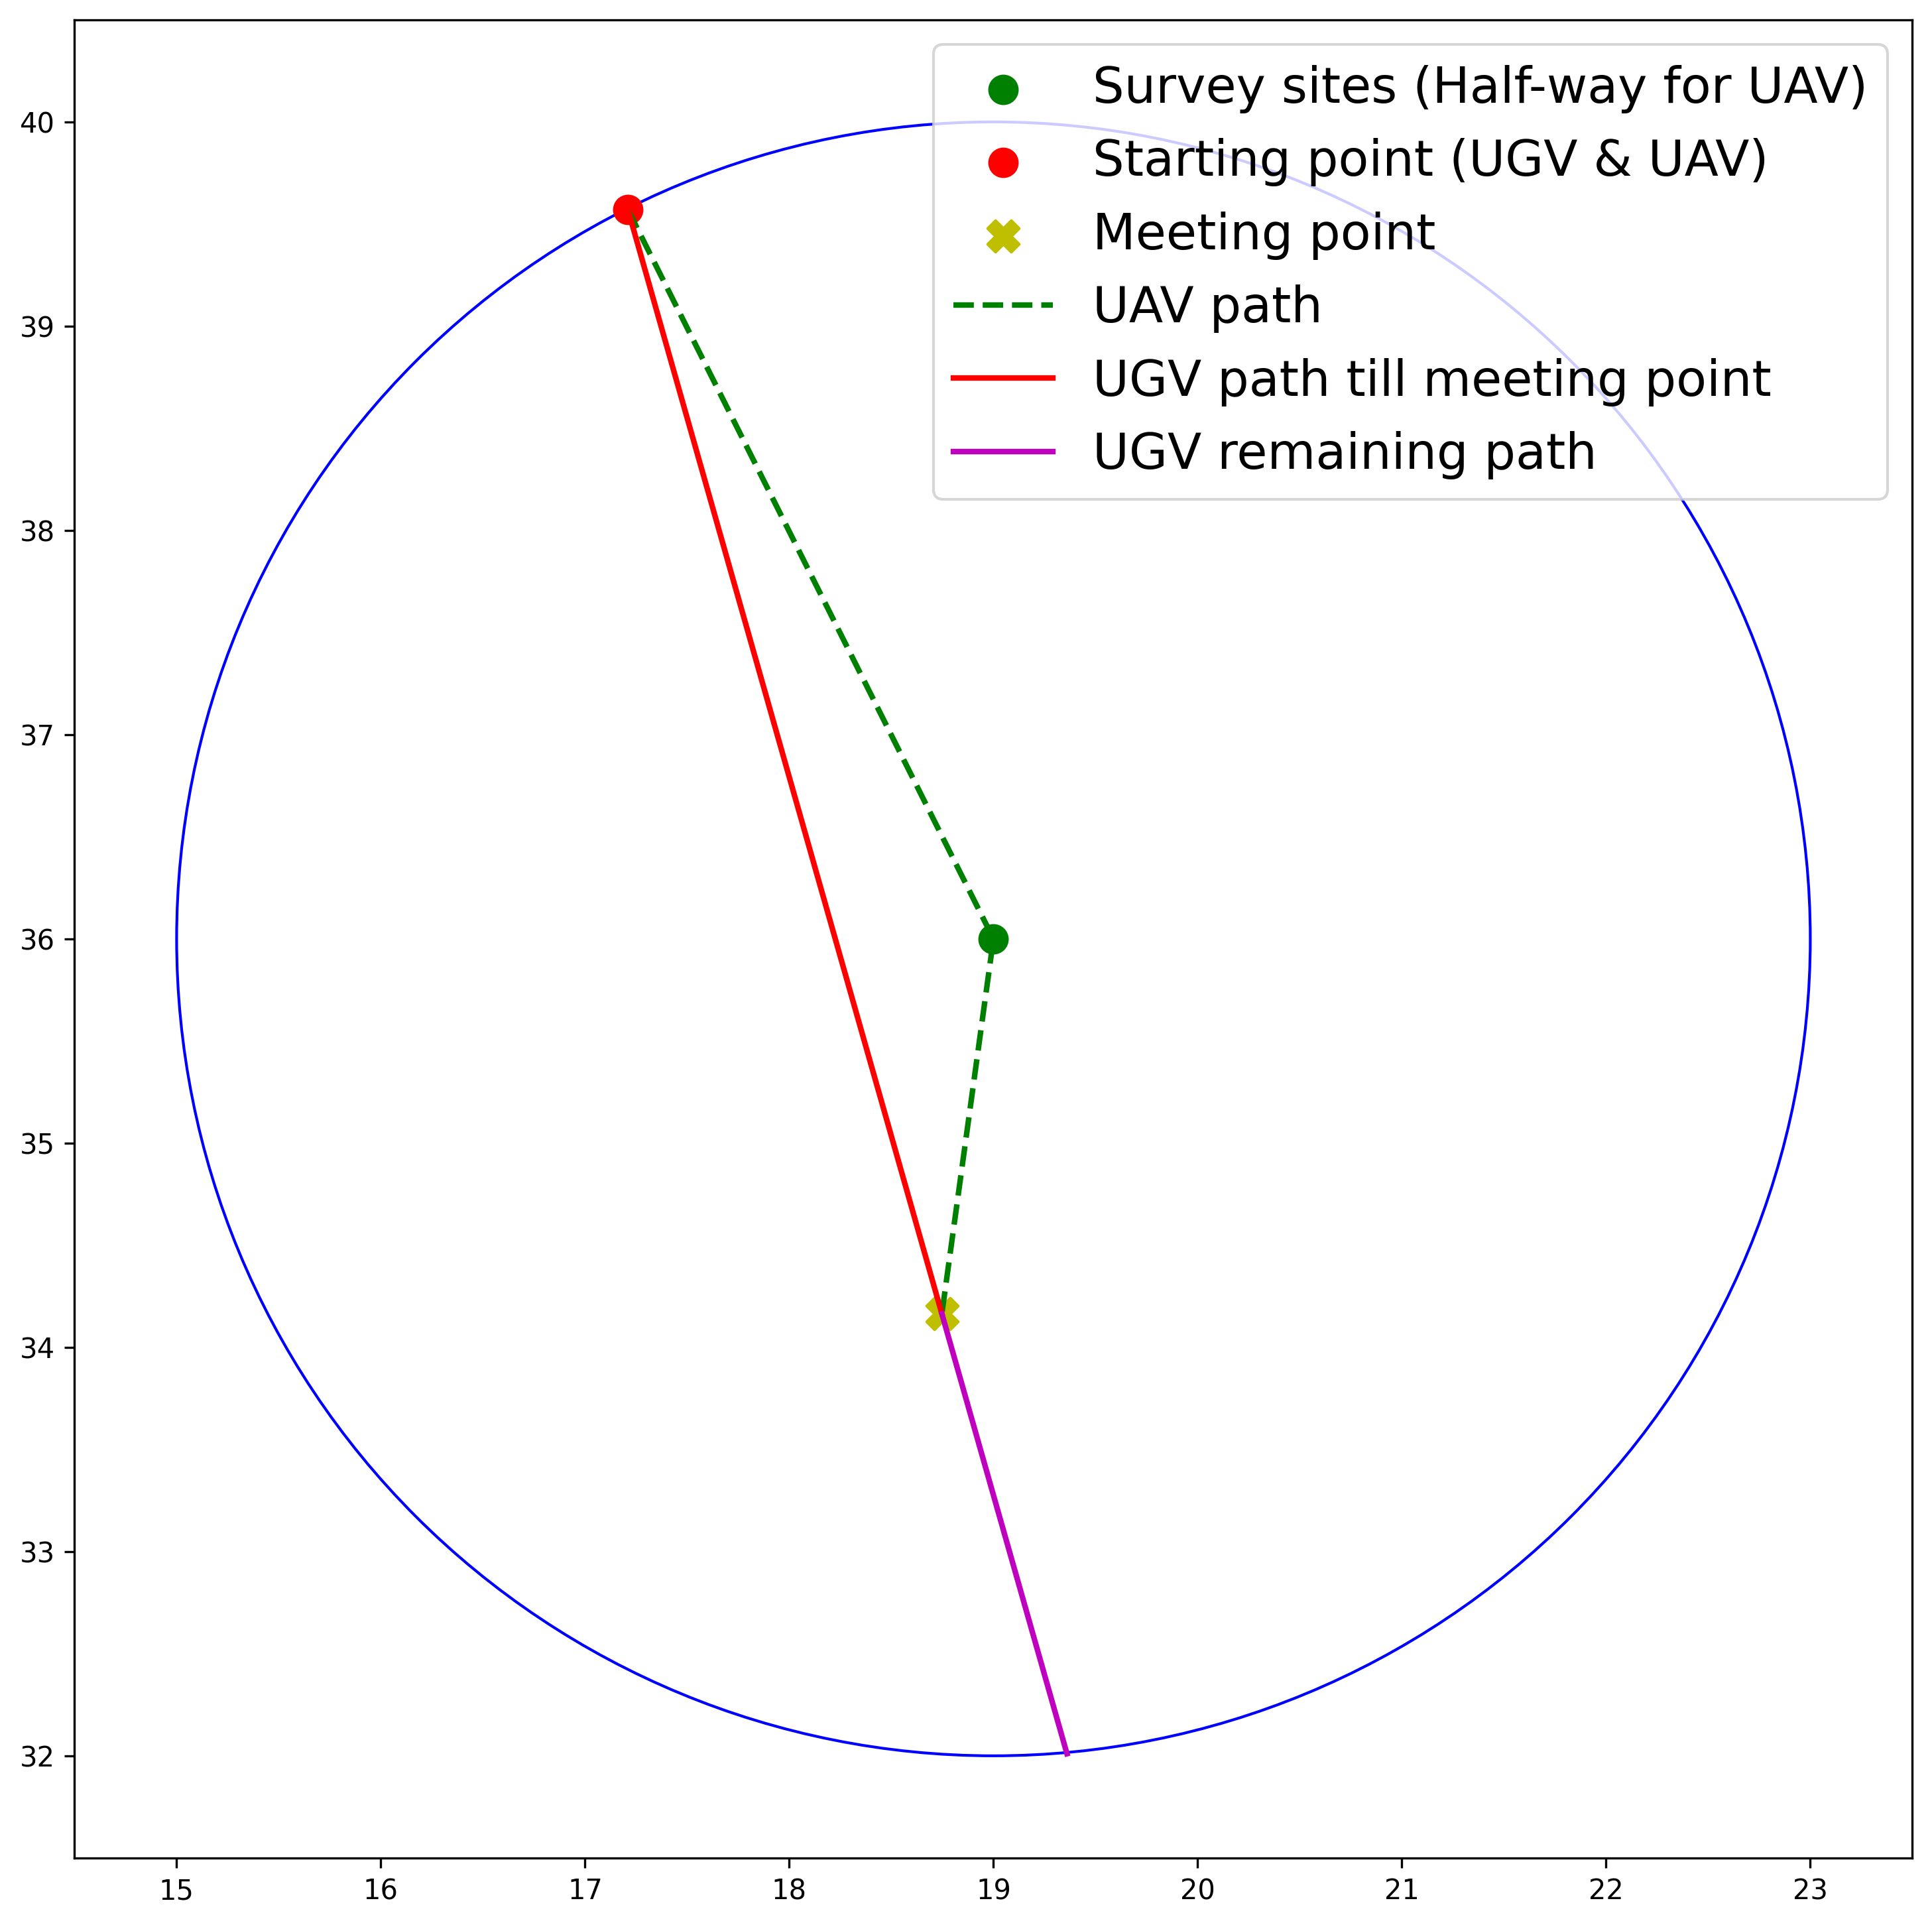

0


In [54]:
# Test the final function with given parameter
radius = 4 
ugv_start = (17.21, 39.57)
ugv_end = (19.36, 32.01)
center = (19, 36)


final_meeting_point, final_wait_time = find_meeting_point_with_survey_final(center,radius,ugv_start,ugv_end, 15, 30, 1/6)
# final_meeting_point, final_wait_time
# Test the updated visualization function using the provided code format
visualize_meeting_point_updated(center,radius,ugv_start,ugv_end, final_meeting_point)
print(final_wait_time)

In [12]:
[ugv_end[0]]

[19.36]